# Linear Regression Example on MPG Dataset

A note on Model Validation. You can see all of the types of metrics that can be calculated in cross_val_score [here](https://scikit-learn.org/stable/modules/model_evaluation.html).

## Import Libraries & Read in Data

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
LinearRegression?

In [ ]:
url = "http://ddc-datascience.s3-website-us-west-1.amazonaws.com/auto-mpg.csv"
cars = pd.read_csv(url)
cars.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
cars.shape

(398, 8)

## Data Cleaning

In [ ]:
cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [ ]:
# Check to see if there are any NA values
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
cars.isnull().sum()*10

,0
mpg,0
cylinders,0
displacement,0
horsepower,60
weight,0
acceleration,0
model year,0
origin,0


In [ ]:
# Look at rows with NAs
cars[cars['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [ ]:
# Look at horsepower column
cars['horsepower'].describe()

,horsepower
count,392.000000
mean,104.469388
std,38.491160
min,46.000000
25%,75.000000
50%,93.500000
75%,126.000000
max,230.000000


In [ ]:
# Fill in NAs with mean value
cars_clean = cars.copy()
mean_hp = cars_clean['horsepower'].mean()
cars_clean['horsepower'].fillna(mean_hp, inplace = True)

<ipython-input-10-238b2bd5e168>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_clean['horsepower'].fillna(mean_hp, inplace = True)


In [ ]:
# Confirm we don't have NAs anymore
cars_clean['horsepower'].isnull().sum()

0

## EDA

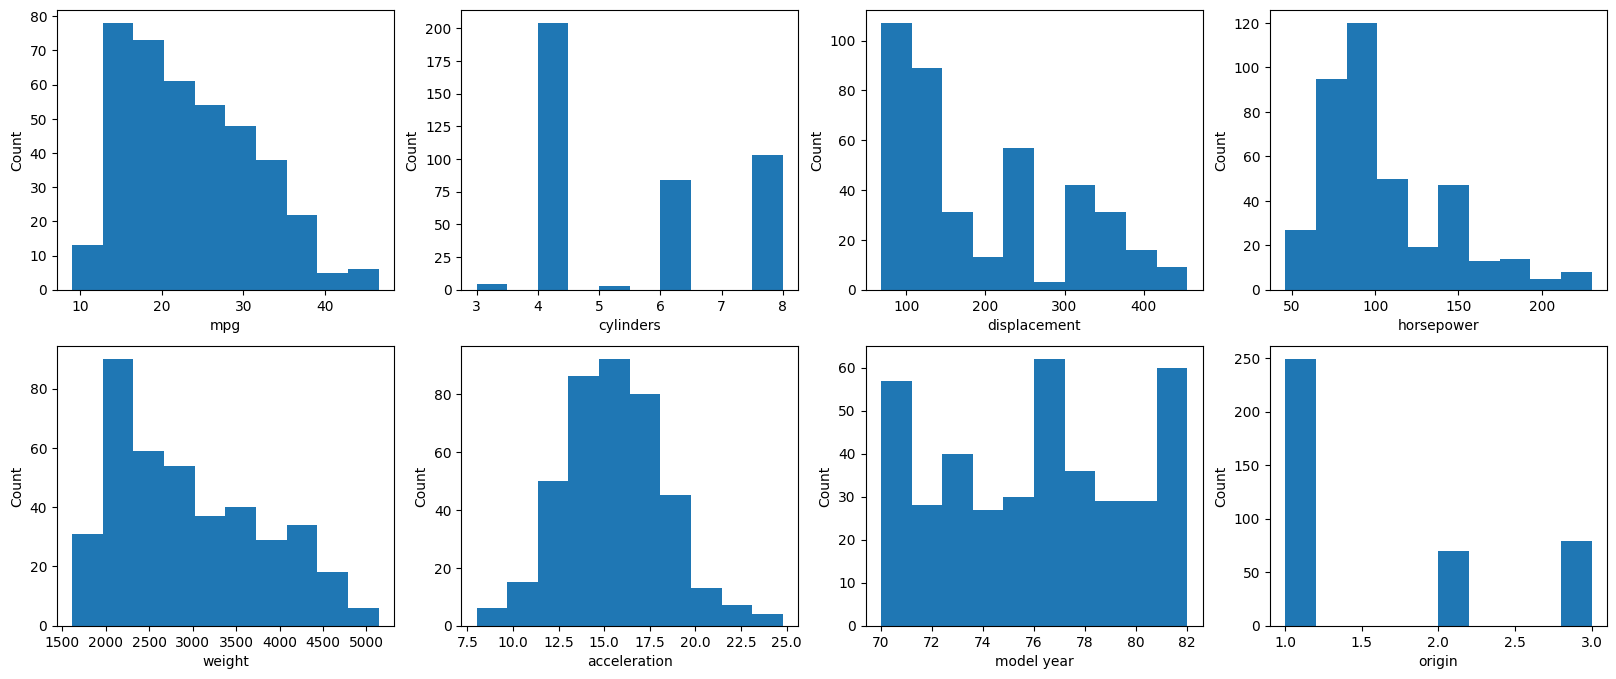

In [ ]:
# Let's plot mpg and all of our predictors
fig, axs = plt.subplots(2,4, figsize = (20,8)) # Creating 2x4 subplots because we have 8 columns in our data
column_names = cars_clean.columns
n = 0
for i in range(2): # Loop through rows
  for j in range(4): # Loop through columns
    axs[i,j].hist(cars_clean[column_names[n]])
    axs[i,j].set_xlabel(column_names[n])
    axs[i,j].set_ylabel('Count')
    n = n + 1

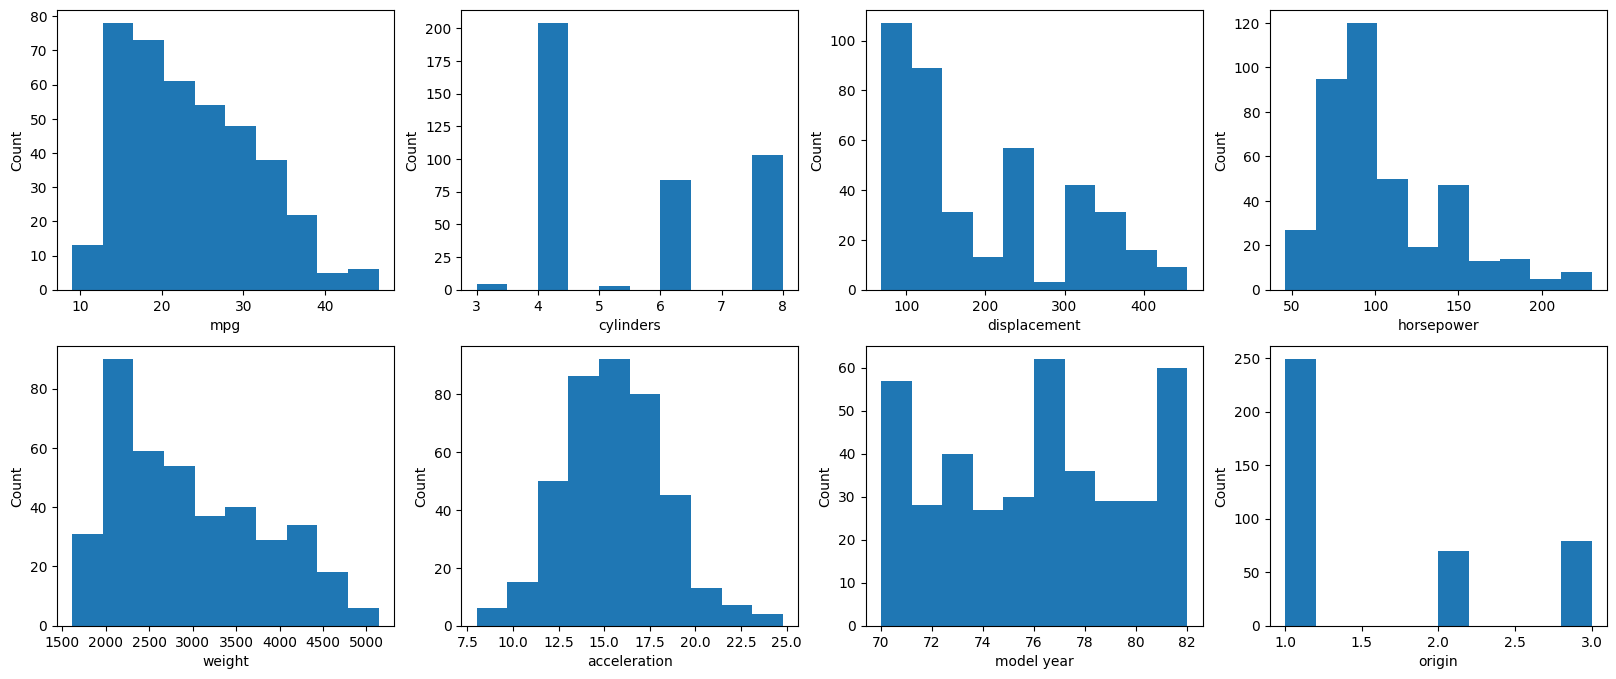

In [ ]:
# Let's plot mpg and all of our predictors
fig, subplots = plt.subplots(2,4, figsize = (20,8)) # Creating 2x4 subplots because we have 8 columns in our data
column_names = cars_clean.columns

subplots = subplots.flatten()[:len(column_names)]  # flatten and slice axs
for n, subplot in enumerate(subplots):             # Loop through axs
  subplot.hist(cars_clean[column_names[n]])
  subplot.set_xlabel(column_names[n])
  subplot.set_ylabel('Count')


## What do we notice?
- MPG distribution slightly skewed
- Cylinders and origin are discrete
- Model years only from 1970-1982
- Doesn't appear to have outliers

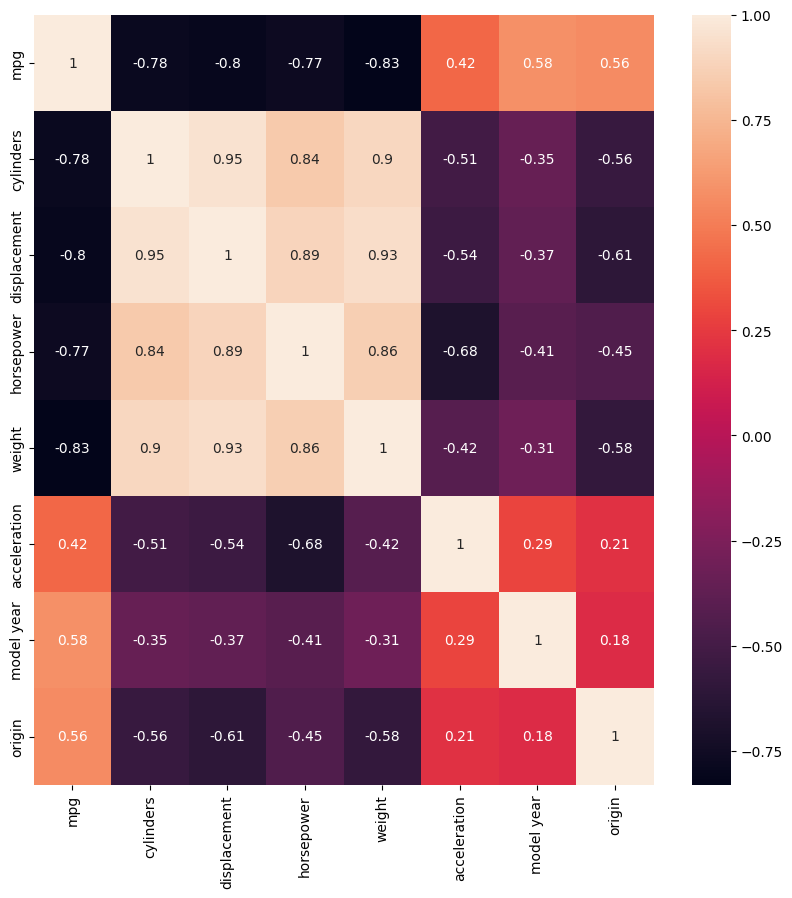

In [ ]:
# Let's take a look at a correlation plot
plt.figure(figsize=(10,10))
correlation_matrix = cars_clean.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) ;

In [ ]:
corrs = cars_clean.corr().round(2).unstack().abs()
corrs = corrs[corrs < 1]
corrs.sort_values(ascending = False)[::2]

cylinders     displacement    0.95
weight        displacement    0.93
              cylinders       0.90
displacement  horsepower      0.89
weight        horsepower      0.86
cylinders     horsepower      0.84
weight        mpg             0.83
mpg           displacement    0.80
              cylinders       0.78
horsepower    mpg             0.77
              acceleration    0.68
displacement  origin          0.61
mpg           model year      0.58
weight        origin          0.58
cylinders     origin          0.56
origin        mpg             0.56
acceleration  displacement    0.54
              cylinders       0.51
origin        horsepower      0.45
acceleration  mpg             0.42
mpg           acceleration    0.42
horsepower    model year      0.41
model year    displacement    0.37
              cylinders       0.35
weight        model year      0.31
model year    acceleration    0.29
acceleration  origin          0.21
model year    origin          0.18
dtype: float64

### What do we notice?


*   Many predictors are highly correlated to each other
*   Many predictors are highly correlated with MPG



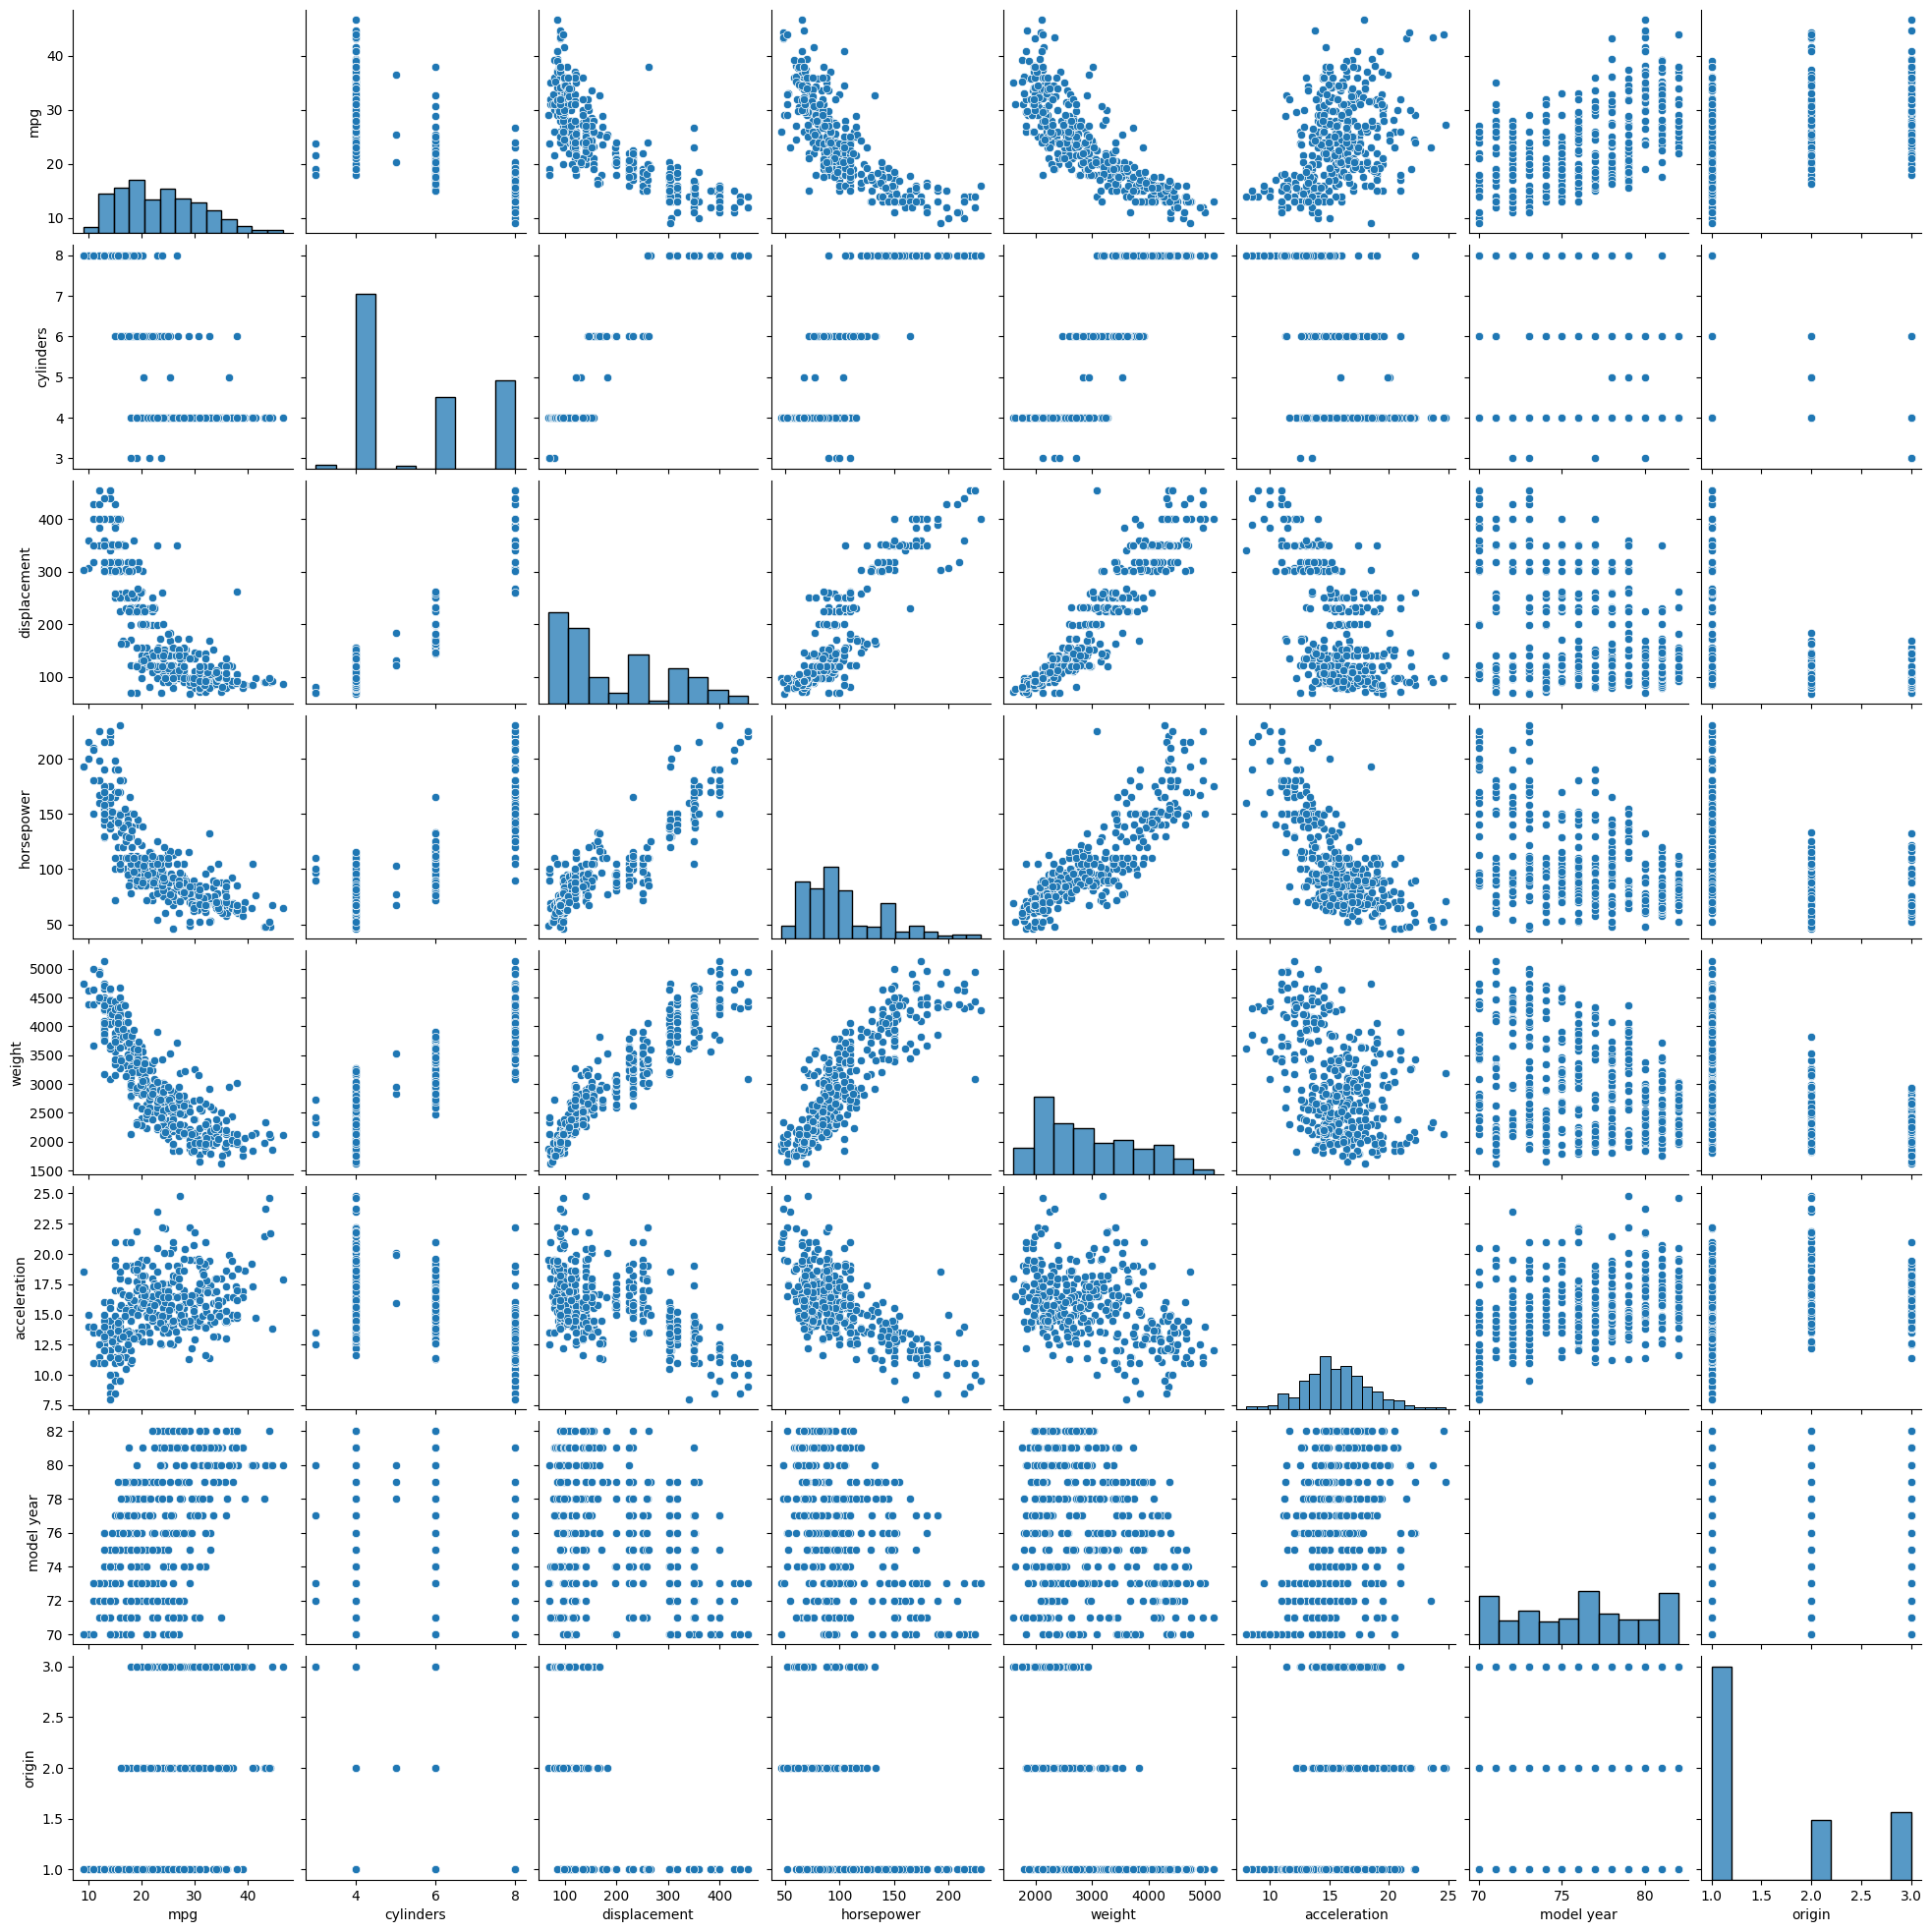

In [ ]:
# Let's plot a pairplot
sns.pairplot(cars_clean) ;

### What do we notice?


*   MPG vs weight, displacement, horsepower has a strong relationship - doesn't appear to be quite linear.

## Fit & Assess Our Model

### Using Statsmodels

In [ ]:
# First we will break up our data into training and testing sets
X = cars_clean[['weight', 'model year', 'origin', 'displacement']]
X2 = sm.add_constant(X) # add constant so that intercept is estimated
print(X2.head())

y = cars_clean['mpg']
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state=4)

   const  weight  model year  origin  displacement
0    1.0    3504          70       1         307.0
1    1.0    3693          70       1         350.0
2    1.0    3436          70       1         318.0
3    1.0    3433          70       1         304.0
4    1.0    3449          70       1         302.0


In [ ]:
# Fit a linear model using statsmodels
myfit = sm.OLS(y_train, X_train).fit()
myfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     333.0
Date:                Thu, 10 Oct 2024   Prob (F-statistic):          2.13e-111
Time:                        21:07:22   Log-Likelihood:                -838.61
No. Observations:                 318   AIC:                             1687.
Df Residuals:                     313   BIC:                             1706.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.8775      4.507     -3.745      0.000     -25.744      -8.011
weight          -0.0073      0.001    -11.006      0.000      -0.009      -0.006
model year       0.7576      0.055     13.716      0.000       0.649       0.866
origin           1.3219      0.309      4.283      0.000       0.715       1.929
displacement     0.0127      0.006      2.225      0.027       0.001       0.024
==============================================================================
Omnibus:                       36.805   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.443
Skew:                           0.638   Prob(JB):                     3.06e-16
Kurtosis:                       4.941   Cond. No.                     7.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using Sklearn

In [ ]:
# First we will break up our data into training and testing sets
X = cars_clean[['weight', 'model year', 'origin', 'displacement']]
y = cars_clean['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

In [ ]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

( myfit2.intercept_, myfit2.coef_ )


(-16.877512158363917,
 array([-0.00731127,  0.75763738,  1.32186922,  0.01270501]))

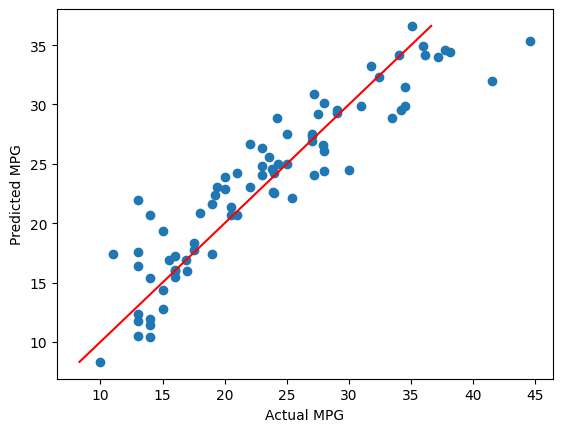

In [ ]:
# See how well our model performs on our test data
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG') ;

In [ ]:
list(zip(y_test,y_pred))[:10]

[(31.8, 33.252619036708296),
 (14.0, 11.413800947977492),
 (21.0, 24.269383763847504),
 (38.1, 34.44126226305251),
 (18.0, 20.840806967875796),
 (23.8, 24.584867606549263),
 (44.6, 35.32940158637827),
 (36.0, 34.946629509602474),
 (20.5, 20.676210093533886),
 (30.0, 24.470536762939627)]

In [ ]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 3.163794329634536


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
cross_val_score?

In [ ]:
# Use cross validation to assess model performance
results = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 3.3914281184489696


#### Repeat, but this time scale the features using the StandardScaler ( Z-score ).

In [ ]:
# scale the features using the StandardScaler ( Z-score )
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=4)

In [ ]:
X

,weight,model year,origin,displacement
0,3504,70,1,307.0
1,3693,70,1,350.0
2,3436,70,1,318.0
3,3433,70,1,304.0
4,3449,70,1,302.0
...,...,...,...,...
393,2790,82,1,140.0
394,2130,82,2,97.0
395,2295,82,1,135.0
396,2625,82,1,120.0


In [ ]:
X_scaled

array([[ 0.63086987, -1.62742629, -0.71514478,  1.0906037 ],
       [ 0.85433297, -1.62742629, -0.71514478,  1.5035143 ],
       [ 0.55047045, -1.62742629, -0.71514478,  1.19623199],
       ...,
       [-0.79858454,  1.62198339, -0.71514478, -0.56103873],
       [-0.40841088,  1.62198339, -0.71514478, -0.70507731],
       [-0.29608816,  1.62198339, -0.71514478, -0.71467988]])

In [ ]:
pd.DataFrame(X_scaled).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,398.0,-1.606755e-16,1.001259,-1.604943,-0.882827,-0.197362,0.753834,2.565185
1,398.0,-1.642461e-15,1.001259,-1.627426,-0.815074,-0.002721,0.809631,1.621983
2,398.0,-5.355850e-17,1.001259,-0.715145,-0.715145,-0.715145,0.533222,1.781589
3,398.0,-1.785283e-17,1.001259,-1.204411,-0.856318,-0.431404,0.658488,2.511784


In [ ]:
# Fit a linear model using Sklearn
model = LinearRegression()
myfit2 = model.fit(X_train, y_train)

(
myfit2.intercept_,
myfit2.coef_
)


(23.52958032572574,
 array([-6.18370168,  2.79793854,  1.0588789 ,  1.32308436]))

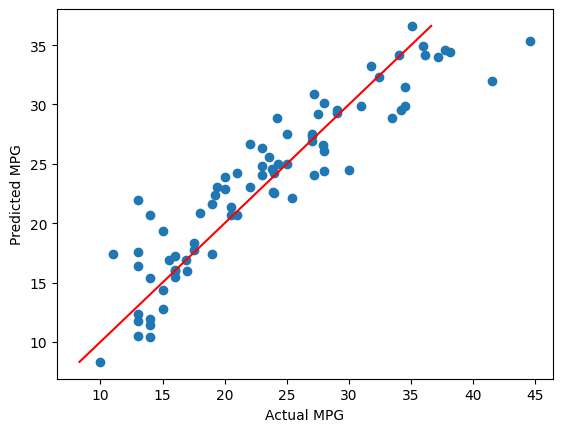

In [ ]:
# See how well our model performs on our test data
y_pred = myfit2.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG') ;

In [ ]:
list(zip(y_test,y_pred))[:10]

[(31.8, 33.25261903670828),
 (14.0, 11.413800947977514),
 (21.0, 24.269383763847493),
 (38.1, 34.44126226305249),
 (18.0, 20.840806967875796),
 (23.8, 24.58486760654926),
 (44.6, 35.32940158637825),
 (36.0, 34.94662950960247),
 (20.5, 20.676210093533882),
 (30.0, 24.470536762939624)]

In [ ]:
# Calculate root mean squared error on test data
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE: {rmse}")

RMSE: 3.1637943296345377


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Use cross validation to assess model performance - scaled
results = cross_val_score(model, X_scaled, y, scoring='neg_root_mean_squared_error', cv = 10)
rmse = abs(results.mean())
print(f"CV RMSE: {rmse}")

CV RMSE: 3.3914281184489594


## Residual Analysis

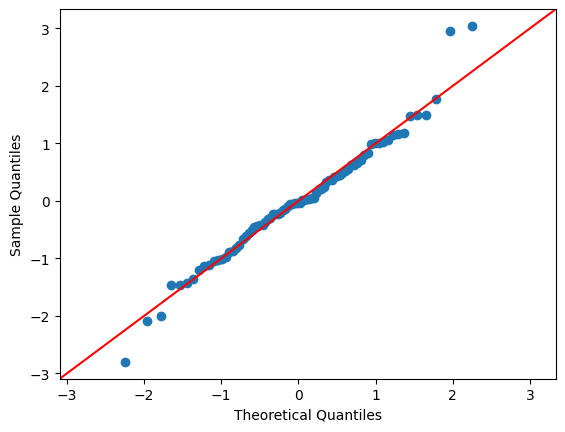

In [ ]:
# QQ Plot - Residuals are normally distributed
res = y_test - y_pred
sm.qqplot(res, fit=True, line="45") ;

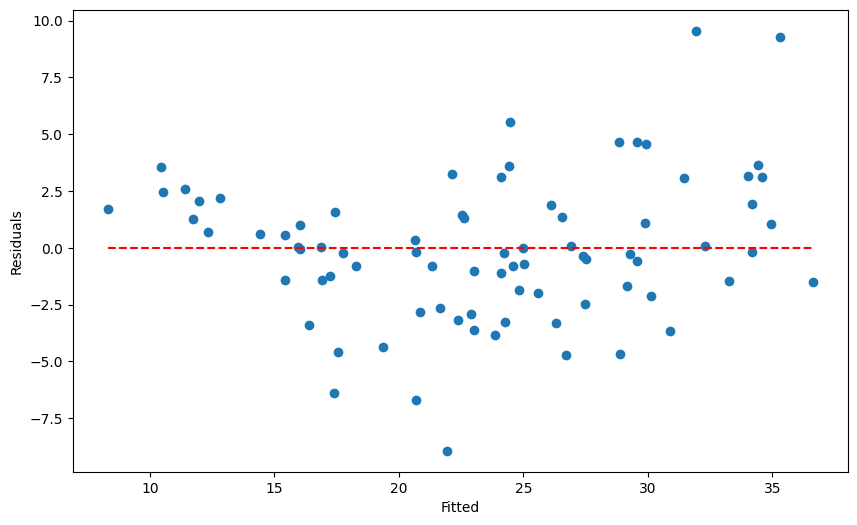

In [ ]:
# Residuals vs Fitted (Predicted) Values - Constant variance
plt.figure(figsize = (10,6))
plt.scatter(y_pred, res)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed') ;

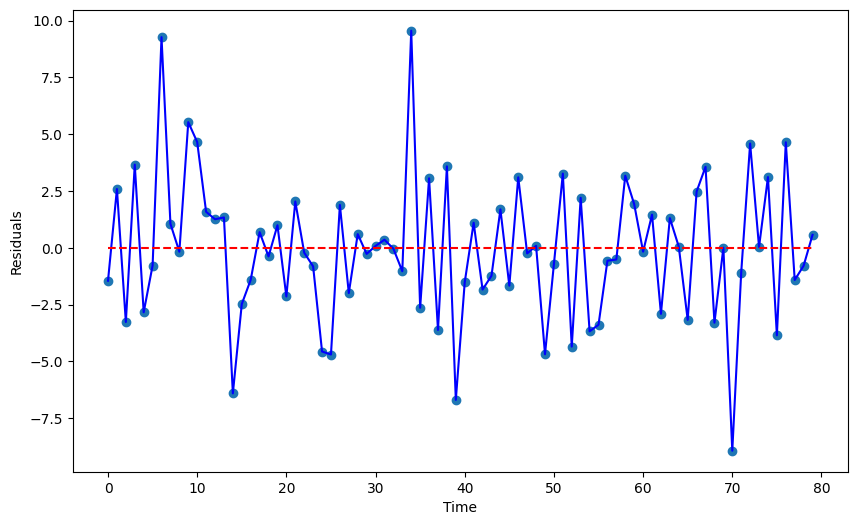

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;